<a href="https://colab.research.google.com/github/mo-mo99/data_analysis/blob/main/scraping_apartments_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
#from requests_html import HTMLSession
from bs4 import BeautifulSoup
import numpy as np
import time
from numpy import random
from google.colab import files
import pandas as pd

In [15]:
upload = files.upload()

Saving index.txt to index.txt


In [42]:
my_ua_list = open('index.txt', 'r').readlines()
my_ua_list = [i.replace('\n', '') for i in my_ua_list]

In [ ]:
def get_random_ua():
  x = random.randint(0, len(my_ua_list)-1)
  return my_ua_list[x]


In [44]:
current_user_agent = get_random_ua()
headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
    'accept-language': 'en-US,en;q=0.8',
    'upgrade-insecure-requests': '1',
    'user-agent': current_user_agent
}

current_url = 'https://mirkvartir.ru/Татарстан+республика/Казань'
def request_sender(url):
  f = requests.get(url, headers=headers)
  delay = np.random.randint(5,25)
  time.sleep(delay)
  return f

In [104]:


def get_items(soup):
  page = BeautifulSoup(soup.text, 'html.parser')
  pages = page.body.find_all('div', { 'class' : ['b-flat m-no-lptitle','b-flat m-no-lptitle m-no-more-offers']})
  return pages


def data_pusher(pages, results):

  
  for page in pages:
    
    details = page.find('a', class_ = 'offer-title').span.text.split(',')
    if len(details) == 3:
      rooms = details[0]
      area = details[1].strip()
      floor = details[2].strip()
    else:
      continue
    
      

    address_items = page.find('div', class_ = 'mobile-subhead').div.find_all('a')

    address = ''
    for ai in address_items:
      address += ' ' + ai.text

    price = page.find('div', class_ = 'price-container').span.text.replace('\u2009', ',')[:-5]

    if page.find('a', class_ = 'm-metro-kazan') != None:
      metro = page.find('a', class_ = 'm-metro-kazan').text
    else :
      metro = 'No'
    
    results.append({'address' : address.strip(),
                    'rooms': rooms,
                    'area': area,
                    'floor': floor,
                    'metro': metro,
                    'price': price})



In [98]:
infa = []
for i in range(2, 400):
  cur_url = f'{current_url}/?p={i}'
  page = request_sender(cur_url)
  items = get_items(page)
  data_pusher(items, infa)
  print(i)

infa

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

[{'address': 'Казань пр-кт Универсиады 16',
  'area': '66 м²',
  'floor': '15/19 этаж',
  'metro': 'No',
  'price': '7,000,000',
  'rooms': '2-комн.'},
 {'address': 'Казань ул. Разведчика Ахмерова',
  'area': '59.6 м²',
  'floor': '5/10 этаж',
  'metro': 'Аметьево',
  'price': '9,900,000',
  'rooms': '2-комн.'},
 {'address': 'Казань ул. Комиссара Габишева 19б',
  'area': '65.2 м²',
  'floor': '1/9 этаж',
  'metro': 'No',
  'price': '6,099,000',
  'rooms': '3-комн.'},
 {'address': 'Казань ул. Дзержинского 6',
  'area': '45 м²',
  'floor': '4/5 этаж',
  'metro': 'Кремлевская',
  'price': '14,000,000',
  'rooms': '1-комн.'},
 {'address': 'Казань ул. Комиссара Габишева 7',
  'area': '54.3 м²',
  'floor': '5/9 этаж',
  'metro': 'No',
  'price': '5,349,999',
  'rooms': '2-комн.'},
 {'address': 'Казань ул. Квартал 41',
  'area': '42.9 м²',
  'floor': '5/5 этаж',
  'metro': 'No',
  'price': '4,290,000',
  'rooms': '2-комн.'},
 {'address': 'Казань ул. Квартал 26',
  'area': '74 м²',
  'floor': 

In [ ]:
import pandas as pd

df = pd.DataFrame(infa)
print(df.shape)
df.head()




In [100]:
new_df = df

In [103]:
new_df.to_csv('home.csv')
from google.colab import files
files.download('home.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
uploaded = files.upload()

Saving home.csv to home.csv


In [45]:
df = pd.read_csv('home.csv')
df.drop(['Unnamed: 0'],inplace=True, axis=1)
df.head()

,address,rooms,area,floor,metro,price
0,Казань пр-кт Универсиады 16,2-комн.,66 м²,15/19 этаж,No,"7,000,000"
1,Казань ул. Разведчика Ахмерова,2-комн.,59.6 м²,5/10 этаж,Аметьево,"9,900,000"
2,Казань ул. Комиссара Габишева 19б,3-комн.,65.2 м²,1/9 этаж,No,"6,099,000"
3,Казань ул. Дзержинского 6,1-комн.,45 м²,4/5 этаж,Кремлевская,"14,000,000"
4,Казань ул. Комиссара Габишева 7,2-комн.,54.3 м²,5/9 этаж,No,"5,349,999"


In [46]:

def room_editor(str):
  if str == 'Студия':
    return 0
  else :
    return str[0]
df.rooms = df.rooms.apply(room_editor).astype(str).astype(int)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9927 entries, 0 to 9926
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          9927 non-null   object 
 1   rooms            9927 non-null   int64  
 2   area             9927 non-null   float64
 3   floor            9927 non-null   object 
 4   metro            9927 non-null   object 
 5   price            9927 non-null   object 
 6   current_floor    9927 non-null   int64  
 7   building_floors  9927 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 620.6+ KB


In [57]:
def area_editor(str):
  return str.replace(' м²', '')

df.area = df.area.apply(area_editor).astype(str).astype(float)

In [62]:
def get_cur_floor(str):
  if '/' in str:
    return str.split('/')[0]
  else:
    return str.replace(' этаж', '')

def get_building_floor(str):
  if '/' in str:
    return str.split('/')[1].replace(' этаж', '')
  else:
    return str.replace(' этаж', '')
df['current_floor'] = df.floor.apply(get_cur_floor).astype(str).astype(int)
df['building_floors'] = df.floor.apply(get_building_floor).astype(str).astype(int)

In [ ]:
df.drop('floor', inplace=True, axis=1)
df.head()

In [78]:
def get_price(str):
  return int(str.replace(',', ''))
df.price = df.price.apply(get_price)

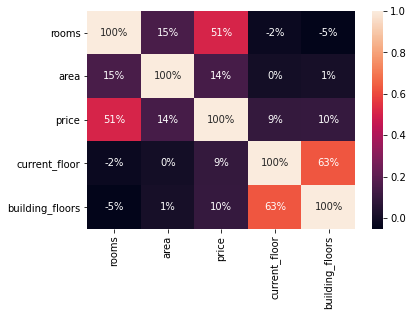

In [81]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, fmt='.0%')